# 數值計算與一般數學課的數學計算

## 目錄
* array oriented programming
* 不同shape轉換
* array的filter功能
* 畫圖
* 模擬數據集
* 分類模擬
* SymPy

#### 一般電腦做的是數值計算
#### e.g. 1/3 + 1/2 電腦只會給你浮點數，但我們有時候就是想要它出現分數

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1 array oriented programming
#### e.g. 開根號乘於10加上15

In [2]:
grades = [56, 62, 71, 45, 70]

### method 1 基本做法

In [3]:
new_grades = []

for h in grades:
    h = np.sqrt(h)*10 + 15
    
    #.2f:小數點後兩位
    print(f"調整後成績:{h:.2f}")
    new_grades.append(h)

調整後成績:89.83
調整後成績:93.74
調整後成績:99.26
調整後成績:82.08
調整後成績:98.67


In [4]:
 new_grades

[89.83314773547883,
 93.74007874011811,
 99.2614977317636,
 82.0820393249937,
 98.66600265340756]

### method 2 換成np.array來做

* for 迴圈只能一個一個算，不能直接對整個list去算，也就是說它無法做平行運算，所以都無法加快

* 直接換成array來做，就可以整排array來做運算

In [5]:
arr_grades = np.array(grades)

In [6]:
arr_grades

array([56, 62, 71, 45, 70])

In [7]:
np.sqrt(arr_grades)*10 + 15

array([89.83314774, 93.74007874, 99.26149773, 82.08203932, 98.66600265])

#### 存成新的成績 : 他不會直接對原本的資料去做運算 (不會覆蓋掉原本的資料)

In [8]:
arr_new_grades = np.sqrt(arr_grades)*10 + 15

In [9]:
arr_new_grades

array([89.83314774, 93.74007874, 99.26149773, 82.08203932, 98.66600265])

* array有很多功能(物件導向在物件的一些功能)

In [10]:
arr_new_grades.mean()

92.71655323715235

### method 3 brocasting : 一次做

(1)

In [11]:
np.array([3, 4, 5, 9, 12]) + 5

array([ 8,  9, 10, 14, 17])

(2)
#### method 1

In [12]:
mygrades = np.array([89, 99, 60])

In [13]:
weights = np.array([0.3, 0.4, 0.3])

In [14]:
mygrades * weights

array([26.7, 39.6, 18. ])

In [15]:
g = mygrades * weights

In [16]:
g.sum()

84.3

#### method 2 

In [17]:
np.dot(mygrades, weights)

84.3

#### method 3 

* np.dot() = @

In [18]:
mygrades @ weights

84.3

### 2 不同shape轉換

#### 1.  0階array (0階tensor) : 一般數字

In [19]:
egg = 94.87

#### 2.  1階array (1階tensor) : 向量型的樣子

In [20]:
egg = np.array([9, 4, 8, 7])

#### 3.  2階array (2階tensor) : 矩陣

(1)

In [21]:
A = np.array([[1, 2, 3], [4, 5, 6]])

In [22]:
A

array([[1, 2, 3],
       [4, 5, 6]])

(2) 重新換成3*3矩陣

In [23]:
B = np.array([3, 9, 6, 12, 8, 20, 1, 10, 7])

In [24]:
B = B.reshape(3,3)

In [25]:
B

array([[ 3,  9,  6],
       [12,  8, 20],
       [ 1, 10,  7]])

(3)

In [26]:
C = A @ B

In [27]:
C

array([[ 30,  55,  67],
       [ 78, 136, 166]])

In [28]:
C[0,0]

30

In [29]:
C[:,2]

array([ 67, 166])

(4) 拉平

In [30]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
A = A.ravel()

In [113]:
print(A)

[1 2 3 4 5 6]


(5) Goal : 想變成 [[3], [9], [1], .......]

In [32]:
x = np.array([3, 9, 1, 3, -5, 1, 2]) 

In [33]:
len(x)

7

* len(x) : 若資料非常大筆我們無法算它有幾行

In [34]:
x.reshape(len(x), 1)

array([[ 3],
       [ 9],
       [ 1],
       [ 3],
       [-5],
       [ 1],
       [ 2]])

### 3 array的filter功能

#### e.g. 過濾出大於60分的
#### method 1 傳統做法

In [35]:
grades = np.array([59, 30, 25, 65, 60, 100, 85, 8])

#### 功能字彙自行分類完畢

In [36]:
passed = np.array([False, False, False, True, True, True, True, False])

#### 用passed作過濾

In [37]:
grades[passed]

array([ 65,  60, 100,  85])

#### method 2

In [38]:
passed = (grades >= 60)

In [39]:
passed

array([False, False, False,  True,  True,  True,  True, False])

In [40]:
grades[passed]

array([ 65,  60, 100,  85])

#### method 3

In [41]:
grades[grades >= 60]

array([ 65,  60, 100,  85])

#### e.g. 過濾出大於60分且小於80分的

In [42]:
(grades>=60) & (grades<=80)

array([False, False, False,  True,  True, False, False, False])

In [43]:
grades[(grades>=60) & (grades<=80)]

array([65, 60])

### 4 畫圖

In [44]:
π = np.pi
x = np.linspace(-2*π, 2*π, 1000)

In [45]:
#array
x

array([-6.28318531, -6.27060636, -6.25802741, -6.24544846, -6.23286951,
       -6.22029056, -6.20771161, -6.19513266, -6.18255371, -6.16997476,
       -6.15739581, -6.14481686, -6.13223791, -6.11965896, -6.10708001,
       -6.09450106, -6.08192211, -6.06934316, -6.05676422, -6.04418527,
       -6.03160632, -6.01902737, -6.00644842, -5.99386947, -5.98129052,
       -5.96871157, -5.95613262, -5.94355367, -5.93097472, -5.91839577,
       -5.90581682, -5.89323787, -5.88065892, -5.86807997, -5.85550102,
       -5.84292207, -5.83034312, -5.81776417, -5.80518522, -5.79260627,
       -5.78002732, -5.76744838, -5.75486943, -5.74229048, -5.72971153,
       -5.71713258, -5.70455363, -5.69197468, -5.67939573, -5.66681678,
       -5.65423783, -5.64165888, -5.62907993, -5.61650098, -5.60392203,
       -5.59134308, -5.57876413, -5.56618518, -5.55360623, -5.54102728,
       -5.52844833, -5.51586938, -5.50329043, -5.49071148, -5.47813254,
       -5.46555359, -5.45297464, -5.44039569, -5.42781674, -5.41

In [46]:
y = np.sin(x)

In [47]:
len(y) == len(x)

True

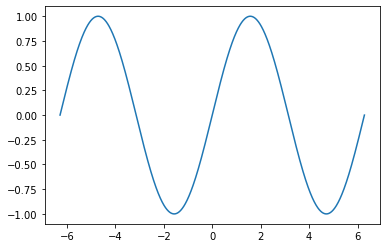

In [48]:
plt.plot(x, y)

#### 把大於0的抓出

In [49]:
y[y>0]

array([2.44929360e-16, 1.25786178e-02, 2.51552454e-02, 3.77278927e-02,
       5.02945704e-02, 6.28532900e-02, 7.54020646e-02, 8.79389084e-02,
       1.00461838e-01, 1.12968871e-01, 1.25458030e-01, 1.37927338e-01,
       1.50374822e-01, 1.62798512e-01, 1.75196443e-01, 1.87566653e-01,
       1.99907185e-01, 2.12216086e-01, 2.24491409e-01, 2.36731210e-01,
       2.48933554e-01, 2.61096510e-01, 2.73218154e-01, 2.85296566e-01,
       2.97329837e-01, 3.09316061e-01, 3.21253344e-01, 3.33139795e-01,
       3.44973534e-01, 3.56752688e-01, 3.68475395e-01, 3.80139798e-01,
       3.91744053e-01, 4.03286322e-01, 4.14764781e-01, 4.26177612e-01,
       4.37523010e-01, 4.48799180e-01, 4.60004337e-01, 4.71136709e-01,
       4.82194534e-01, 4.93176062e-01, 5.04079556e-01, 5.14903290e-01,
       5.25645553e-01, 5.36304643e-01, 5.46878875e-01, 5.57366576e-01,
       5.67766086e-01, 5.78075760e-01, 5.88293965e-01, 5.98419086e-01,
       6.08449521e-01, 6.18383682e-01, 6.28219997e-01, 6.37956911e-01,
      

In [50]:
len(y[y>0])

500

#### 錯誤示範

In [51]:
#錯誤 #因為len(x)!=len(y)
#plt.scatter(x, y[y>0])

#### 正確示範

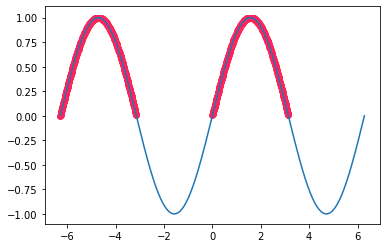

In [52]:
plt.scatter(x[y>0], y[y>0], c='#FF235A')
plt.plot(x, y)

### 5 模擬數據集

In [53]:
x = np.linspace(0, 1.3, 50)
y = np.sin(x)

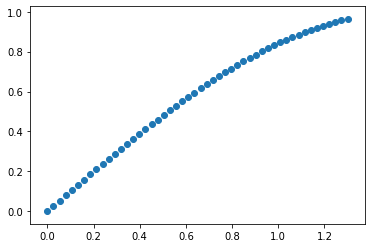

In [54]:
plt.scatter(x,y)

####  模擬雜訊

In [55]:
#雜訊通常都是由常態分布隨機取出的
noise = 0.1 * np.random.randn(50)

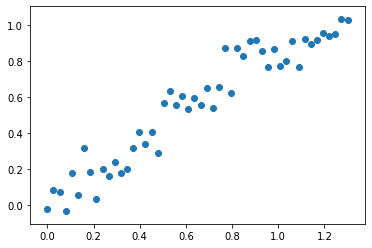

In [56]:
plt.scatter(x, y + noise)

### 6 分類模擬

* 2 : x,y座標

In [57]:
P = np.random.randn(50, 2)

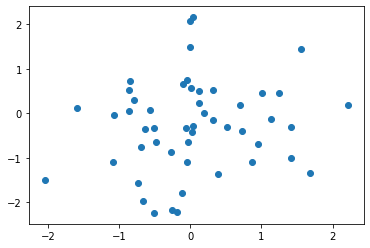

In [58]:
plt.scatter(P[:,0], P[:,1])

#### 類別

In [59]:
cl = np.random.randint(1, 5, 50)

In [60]:
cl

array([2, 3, 3, 4, 4, 3, 3, 3, 2, 3, 4, 2, 4, 4, 4, 3, 1, 3, 3, 4, 3, 2,
       2, 4, 3, 3, 3, 4, 4, 4, 1, 1, 2, 3, 4, 4, 4, 1, 4, 1, 4, 3, 1, 4,
       4, 1, 4, 2, 2, 2])

####  希望各類各標一個顏色
* cmap 的顏色可以上matplotlib cmap找找!

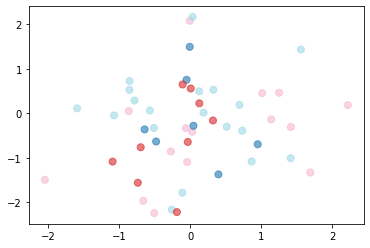

In [61]:
#c=cl:每個分類一種顏色 #s=50(size) #alpha=0.6透明度
plt.scatter(P[:,0], P[:,1], c=cl, s=50, alpha=0.6, cmap='tab20') 

###  7 SymPy
### SymPy : 符號型的運算 (像平常數學課時的運算)
### Numpy : 做數值型的運算 (答案只會給我們float)

### ● 數值型的運算

In [115]:
1/2 + 1/3

### ● 數學上的運算

In [63]:
import sympy as sp

### 7.1 分數的表示
####  (1) 傳統型

In [116]:
# 起始動作
sp.init_printing()

In [66]:
sp.Rational(1, 2) + sp.Rational(1, 3)

#### (2) 簡化

In [67]:
sp.sympify(1)/2

In [69]:
sp.sympify(1)/2 + sp.sympify(1)/3

#### (3) 再簡化

In [70]:
#之後就無法再令其他東西為S
from sympy import S

In [71]:
sp.S(1)/2 + sp.S(1)/3

In [72]:
S(1)/2 + S(1)/3

### 7.2 其他運算

In [73]:
sp.sqrt(3)

In [74]:
sp.pi

#### 指定變數

In [75]:
x = sp.symbols('x')

In [76]:
x

In [77]:
x**2

#### 特殊符號

In [78]:
#r : 在python中'\'通常會被吃掉去做換行等等的動作，而此處我們要顯示希臘字母因此我們需要'\'，所以'r'就是用來保留它的！
xx = sp.symbols(r'\xi')

In [79]:
xx

### 7.3 變數

In [80]:
from sympy.abc import x

In [81]:
x

In [82]:
f = x**2 - 3*x + 5

In [83]:
f

### 7.3.1 畫圖

* 畫圖完全不用給範圍

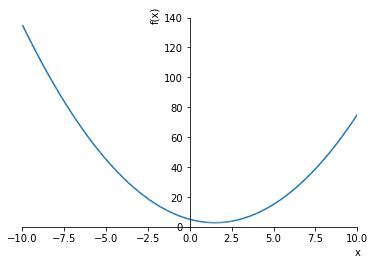

In [84]:
sp.plot(f)

In [85]:
gg = -x**2

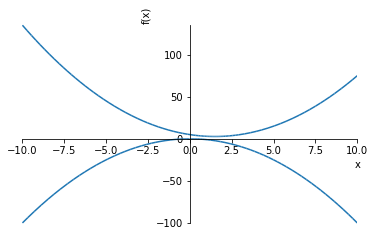

In [86]:
sp.plot(f,gg)

### 7.3.2 微分/積分

In [87]:
sp.diff(f)

In [88]:
sp.integrate(f)

### 7.3.3 帶入公式

In [89]:
f.subs(x,2)

### 7.3.4 import另一個變數

In [90]:
from sympy.abc import y 

In [91]:
g = 3*x*y + 2*x - 5*y**2

In [92]:
g

#### 微分/積分
* 兩個變數要告訴他對誰微分

In [93]:
sp.diff(g, x)

In [94]:
sp.integrate(g, x)

####  e.g. 積分範圍從1到5

In [95]:
sp.integrate(sp.log(x), (x, 1, 5))

####  e.g. x趨近於0的極限

In [96]:
sp.limit(sp.sin(x)/x, x, 0)

### 7.4 矩陣

In [97]:
AA = sp.Matrix([[1, 2, 3], [4, 5, 7], [7, 8, 9]])

In [98]:
AA

⎡1  2  3⎤
⎢       ⎥
⎢4  5  7⎥
⎢       ⎥
⎣7  8  9⎦

In [99]:
AA.rref()

⎛⎡1  0  0⎤           ⎞
⎜⎢       ⎥           ⎟
⎜⎢0  1  0⎥, (0, 1, 2)⎟
⎜⎢       ⎥           ⎟
⎝⎣0  0  1⎦           ⎠

In [100]:
AA.det()

In [101]:
AA.inv()

⎡-11/6  1   -1/6⎤
⎢               ⎥
⎢13/6   -2  5/6 ⎥
⎢               ⎥
⎣-1/2   1   -1/2⎦

### 7.5 質數

####  判斷質數

In [102]:
a = 9487

In [103]:
sp.isprime(a)

False

####  第N個質數

In [104]:
sp.prime(987)

* 孿生質數 : 一般來說質數不可能連續，質數最小的距離就是2
* 孿生質數的大突破 : 孿生質數就是質數最大的距離，質數的距離不會再無限放大，但質數的距離不知道會不會收到2，目前已收到6

   e.g.   5和7就是孿生質數

In [118]:
sp.prime(564348)

####  孿生質數的判別

In [105]:
a = sp.prime(2)
b = sp.prime(2+1)

if b-a == 2:
    print((a, b), "就是孿生質數")

(3, 5) 就是孿生質數


###  7.6 π

(1)

In [107]:
sp.pi

* n(100) : 給出100項

In [108]:
(sp.pi).n(100)

(2)

In [109]:
π = sp.pi

In [110]:
π.n(100)

(3) 判斷自己的生日是否出現在π中

In [111]:
magic = str(π.n(10000))

In [112]:
'1227' in magic

True